In [1]:
#DL_03
# Convolutional neural network (CNN) (Any One from the following)
# • Use any dataset of plant disease and design a plant disease detection system using CNN


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define batch specifications
batch_size = 32  # You can adjust this based on your preference
img_height, img_width = 224, 224  # Adjust these dimensions based on your images

In [ ]:
# Define paths to the training and validation datasets
# train_dataset_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train'
# valid_dataset_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid'

from google.colab import files
uploaded = files.upload()

In [ ]:
# Load and preprocess the training dataset with error handling
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_path,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',  # Use 'int' labels for sparse categorical_crossentropy
    validation_split=0.2,
    subset='training',
    smart_resize=True  # Resize the images preserving their aspect ratio
)

NotFoundError: Could not find directory /content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train

In [ ]:
# Load and preprocess the validation dataset with error handling
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dataset_path,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='int',  # Use 'int' labels for sparse categorical_crossentropy
    validation_split=0.2,
    subset='validation',
    smart_resize=True  # Resize the images preserving their aspect ratio
)

NotFoundError: Could not find directory /content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid

In [ ]:
# Get class names from the training dataset
class_names = training_ds.class_names


In [ ]:
# Define the CNN model
MyCnn = tf.keras.models.Sequential([
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
# Compile the model
MyCnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
retVal = MyCnn.fit(training_ds, validation_data=validation_ds, epochs=2)

Epoch 1/2
590/590 [==============================] - 4031s 7s/step - loss: 0.5713 - accuracy: 0.8223 - val_loss: 6.4924 - val_accuracy: 0.0000e+00
Epoch 2/2
590/590 [==============================] - 2868s 5s/step - loss: 0.1661 - accuracy: 0.9412 - val_loss: 8.4406 - val_accuracy: 0.0000e+00


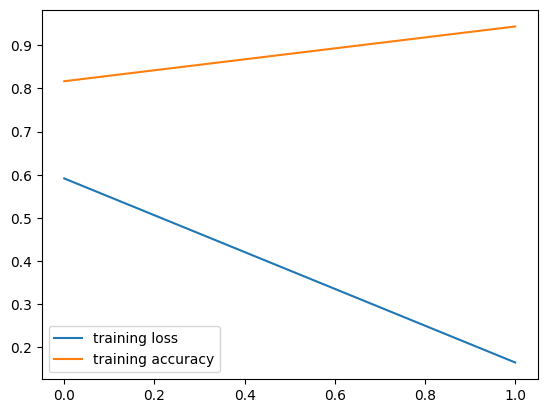

In [ ]:
plt.plot(retVal.history['loss'], label = 'training loss')
plt.plot(retVal.history['accuracy'], label = 'training accuracy')
plt.legend()

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))

<Figure size 3000x3000 with 0 Axes>

<Figure size 3000x3000 with 0 Axes>

1/1 [==============================] - 1s 1s/step
Shape of 'images' tensor: (32, 224, 224, 3)


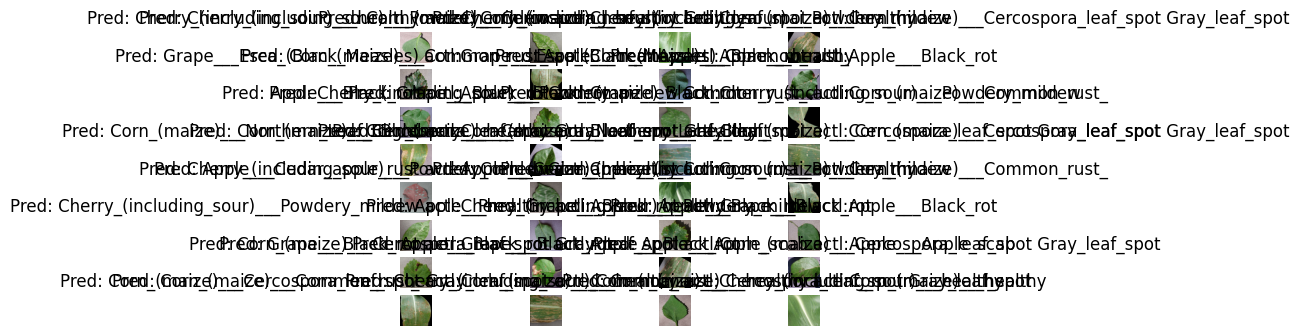

In [ ]:
# Limit the loop to the number of images in the batch
num_images_to_visualize = min(40, validation_ds.cardinality().numpy() * batch_size)
for images, labels in validation_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels

    # Print the shape of the 'images' tensor
    print("Shape of 'images' tensor:", images.shape)

    # Limit the loop to the actual number of images in the batch
    for i in range(min(num_images_to_visualize, images.shape[0])):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [ ]:
plt.show()

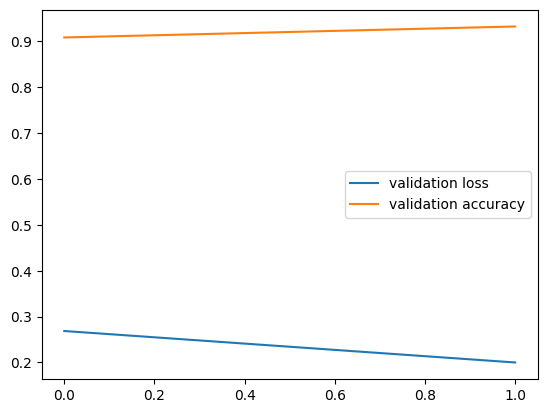

In [ ]:
plt.plot(retVal.history['val_loss'], label = 'validation loss')
plt.plot(retVal.history['val_accuracy'], label = 'validation accuracy')
plt.legend()